In [1]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [2]:
import pandas as pd

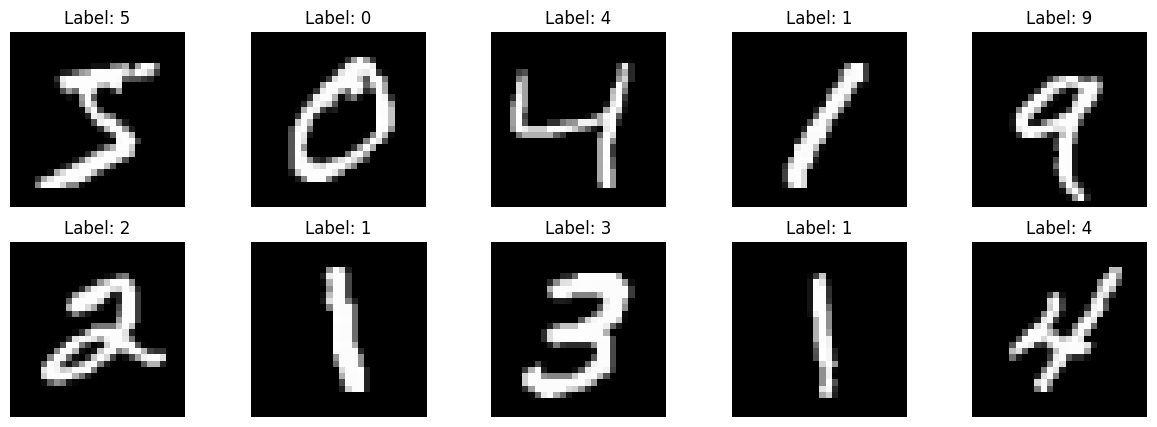

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist_train = pd.read_csv('/content/drive/MyDrive/mnist_train.csv/mnist_train.csv')
mnist_test = pd.read_csv('/content/drive/MyDrive/mnist_test.csv/mnist_test.csv')

# Example function to display a specified number of images
def display_mnist_images(dataframe, num_images=10):
    plt.figure(figsize=(15, 5))

    for i in range(num_images):
        # Get the label
        label = dataframe.iloc[i, 0]
        # Get the pixel values and reshape to 28x28
        image = dataframe.iloc[i, 1:].values.reshape(28, 28)

        # Normalize pixel values to range [0, 1]
        image = image.astype(np.float32) / 255.0

        # Display the image
        plt.subplot(2, 5, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f'Label: {label}')
        plt.axis('off')

    plt.show()

# Display the first 10 images from the training set
display_mnist_images(mnist_train, num_images=10)


In [4]:
train_digit_counts = mnist_train.iloc[:, 0].value_counts().sort_index()
test_digit_counts = mnist_test.iloc[:, 0].value_counts().sort_index()

# Display the counts
print("Train Digit Counts:")
print(train_digit_counts)

print("\nTest Digit Counts:")
print(test_digit_counts)

Train Digit Counts:
label
0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
Name: count, dtype: int64

Test Digit Counts:
label
0     980
1    1135
2    1032
3    1010
4     982
5     892
6     958
7    1028
8     974
9    1009
Name: count, dtype: int64


In [5]:
train_features = mnist_train.iloc[:, 1:]  # Assuming the first column is the label
test_features = mnist_test.iloc[:, 1:]    # Assuming the first column is the label

# Check for intersections by converting rows to tuples
train_set = set(map(tuple, train_features.values))
test_set = set(map(tuple, test_features.values))

# Find the intersection
intersection = train_set & test_set

# Display the results
if intersection:
    print(f"There are {len(intersection)} overlapping images between training and testing datasets.")
else:
    print("There are no overlapping images between training and testing datasets.")

There are no overlapping images between training and testing datasets.


# Final_Generation

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import h5py
import gc

# Separate digits from training and testing sets
digit_indices_train = {}
digit_indices_test = {}

for digit in range(10):
    digit_indices_train[digit] = mnist_train[mnist_train['label'] == digit].index[:5000].tolist()  # First 5000
    digit_indices_test[digit] = mnist_test[mnist_test['label'] == digit].index.tolist()

# Split the training dataset into training (4000 per digit) and validation (1000 per digit)
train_indices = {}
val_indices = {}

for digit in range(10):
    train_indices[digit] = digit_indices_train[digit][:4000]
    val_indices[digit] = digit_indices_train[digit][4000:]

# Create selected images mapping for training and testing
selected_train_images = {digit: mnist_train.iloc[train_indices[digit], 1:].values.reshape(-1, 28, 28) for digit in range(10)}
selected_val_images = {digit: mnist_train.iloc[val_indices[digit], 1:].values.reshape(-1, 28, 28) for digit in range(10)}
selected_test_images = {digit: mnist_test.iloc[digit_indices_test[digit], 1:].values.reshape(-1, 28, 28) for digit in range(10)}
print(len(selected_test_images[1]))
# Helper functions for Sudoku creation
unique_grids = []

1135


In [7]:
# Helper function to convert images to tuples for set operations
def images_to_tuples(images_dict):
    images_as_tuples = {}
    for digit, images in images_dict.items():
        images_as_tuples[digit] = {tuple(image.flatten()) for image in images}
    return images_as_tuples

# Convert training, validation, and test images to sets of tuples
train_images_tuples = images_to_tuples(selected_train_images)
val_images_tuples = images_to_tuples(selected_val_images)
test_images_tuples = images_to_tuples(selected_test_images)

# Check intersections
for digit in range(10):
    train_val_intersection = train_images_tuples[digit] & val_images_tuples[digit]
    train_test_intersection = train_images_tuples[digit] & test_images_tuples[digit]
    val_test_intersection = val_images_tuples[digit] & test_images_tuples[digit]

    print(f"Digit {digit}:")
    print(f"  Train-Val Intersection: {len(train_val_intersection)}")
    print(f"  Train-Test Intersection: {len(train_test_intersection)}")
    print(f"  Val-Test Intersection: {len(val_test_intersection)}")
    print()


Digit 0:
  Train-Val Intersection: 0
  Train-Test Intersection: 0
  Val-Test Intersection: 0

Digit 1:
  Train-Val Intersection: 0
  Train-Test Intersection: 0
  Val-Test Intersection: 0

Digit 2:
  Train-Val Intersection: 0
  Train-Test Intersection: 0
  Val-Test Intersection: 0

Digit 3:
  Train-Val Intersection: 0
  Train-Test Intersection: 0
  Val-Test Intersection: 0

Digit 4:
  Train-Val Intersection: 0
  Train-Test Intersection: 0
  Val-Test Intersection: 0

Digit 5:
  Train-Val Intersection: 0
  Train-Test Intersection: 0
  Val-Test Intersection: 0

Digit 6:
  Train-Val Intersection: 0
  Train-Test Intersection: 0
  Val-Test Intersection: 0

Digit 7:
  Train-Val Intersection: 0
  Train-Test Intersection: 0
  Val-Test Intersection: 0

Digit 8:
  Train-Val Intersection: 0
  Train-Test Intersection: 0
  Val-Test Intersection: 0

Digit 9:
  Train-Val Intersection: 0
  Train-Test Intersection: 0
  Val-Test Intersection: 0



In [8]:
def is_array_in_list(target_array, list_of_arrays):
    for array in list_of_arrays:
        if np.array_equal(array, target_array):
            return True
    return False
def are_elements_distinct(matrix):
    # Check if the input is a 3x3 NumPy array
    if matrix.shape != (3, 3):
        raise ValueError("Input must be a 3x3 NumPy array.")

    # Check rows for distinct elements
    for row in matrix:
        if len(set(row)) != len(row):  # If the set size is less than row size, there are duplicates
            return True

    # Check columns for distinct elements
    for col in range(matrix.shape[1]):
        if len(set(matrix[:, col])) != matrix.shape[0]:  # If the set size is less than column size, there are duplicates
            return True

    return False
def save_to_hdf5(images, labels, filename, start_index):
    with h5py.File(filename, 'a') as f:  # Open HDF5 file in append mode
        img_shape = images[0].shape
        # Create datasets if they don't exist
        if 'images' not in f:
            f.create_dataset('images', data=np.empty((0, *img_shape), dtype=np.uint8), maxshape=(None, *img_shape), chunks=True)
            f.create_dataset('labels', data=np.empty((0,), dtype=np.bool_), maxshape=(None,), chunks=True)

        # Append new images and labels
        f['images'].resize((f['images'].shape[0] + len(images), *img_shape))
        f['images'][-len(images):] = images
        f['labels'].resize((f['labels'].shape[0] + len(labels),))
        f['labels'][-len(labels):] = labels


In [9]:
def create_valid_sudoku_image(selected_images):
    grid_size = 3
    composite_image = np.zeros((28 * grid_size, 28 * grid_size), dtype=np.uint8)
    grid = np.full((grid_size, grid_size), -1)

    for i in range(grid_size):
        for j in range(grid_size):
            while True:
                digit = random.choice(range(10))
                if digit not in grid[i, :] and digit not in grid[:, j]:
                    break
            grid[i, j] = digit

    if is_array_in_list(grid, unique_grids):
        print("Already exist repeat.....")
        return create_valid_sudoku_image(selected_images)
    if are_elements_distinct(grid)==True:
      print("Invalid sudoku repeat....")
      return create_valid_sudoku_image(selected_images)
    for i in range(grid_size):
        for j in range(grid_size):
            composite_image[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = selected_images[grid[i, j]][random.randint(0, len(selected_images[grid[i, j]]) - 1)]

    unique_grids.append(grid)
    return composite_image

def create_invalid_sudoku_image(selected_images):
    grid_size = 3
    composite_image = np.zeros((28 * grid_size, 28 * grid_size), dtype=np.uint8)
    grid = np.full((grid_size, grid_size), -1)

    for i in range(grid_size):
        for j in range(grid_size):
            digit = random.choice(range(10))  # Allow repetition
            grid[i, j] = digit
    if is_array_in_list(grid, unique_grids):
        print("Already exist repeat.....")
        return create_invalid_sudoku_image(selected_images)

    if are_elements_distinct(grid)==False:
      print("Valid sudoku repeat....")
      return create_invalid_sudoku_image(selected_images)
    for i in range(grid_size):
        for j in range(grid_size):
            composite_image[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = selected_images[grid[i, j]][random.randint(0, len(selected_images[grid[i, j]]) - 1)]

    return composite_image

In [10]:
def display_random_images(images, title, num_images=10):
    plt.figure(figsize=(20, 10))
    random_indices = random.sample(range(len(images)), num_images)
    for i, idx in enumerate(random_indices):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[idx].reshape(28 * 3, 28 * 3), cmap='gray')
        plt.axis('off')
        plt.title(f"{title} #{idx}")
    plt.show()

In [ ]:
# Generate training dataset
training_images = []
training_labels = []
unique_grids=[]
for i in range(250000):  # 50k valid
    img = create_valid_sudoku_image(selected_train_images)
    training_images.append(img.flatten())
    training_labels.append(True)
    if i % 1000 == 0:
        print(f'Generated valid images: {i}')
    if len(training_images) >= 5000:
        save_to_hdf5(np.array(training_images), training_labels, '/content/drive/MyDrive/sudoku_training_images_final3.h5',len(training_images))
        training_images.clear()
        training_labels.clear()
        gc.collect()



Generated valid images: 0
Generated valid images: 1000
Generated valid images: 2000
Generated valid images: 3000
Generated valid images: 4000
Generated valid images: 5000
Generated valid images: 6000
Generated valid images: 7000
Generated valid images: 8000
Generated valid images: 9000
Generated valid images: 10000
Generated valid images: 11000
Generated valid images: 12000
Generated valid images: 13000
Generated valid images: 14000
Already exist repeat.....
Generated valid images: 15000
Generated valid images: 16000
Generated valid images: 17000
Generated valid images: 18000
Generated valid images: 19000
Generated valid images: 20000
Generated valid images: 21000
Already exist repeat.....
Generated valid images: 22000
Generated valid images: 23000
Generated valid images: 24000
Generated valid images: 25000
Generated valid images: 26000
Generated valid images: 27000
Generated valid images: 28000
Already exist repeat.....
Generated valid images: 29000
Already exist repeat.....
Generated

In [ ]:
training_images = []
training_labels = []
for i in range(950000):  # 50k invalid
    img = create_invalid_sudoku_image(selected_train_images)
    training_images.append(img.flatten())
    training_labels.append(False)
    if i % 1000 == 0:
        print(f'Generated valid images: {i}')
    if len(training_images) >= 5000:
        save_to_hdf5(np.array(training_images), training_labels, '/content/drive/MyDrive/sudoku_training_images_final2.h5',len(training_images))
        training_images.clear()
        training_labels.clear()
        gc.collect()

In [ ]:
# Generate validation dataset (20k images: 10k valid, 10k invalid)
validation_images = []
validation_labels = []

for i in range(15000):
    img = create_valid_sudoku_image(selected_val_images)
    validation_images.append(img.flatten())
    validation_labels.append(True)
    if i % 1000 == 0:
        print(f'Generated valid images: {i}')

for i in range(15000):
    img = create_invalid_sudoku_image(selected_val_images)
    validation_images.append(img.flatten())
    validation_labels.append(False)
    if i % 1000 == 0:
        print(f'Generated valid images: {i}')
save_to_hdf5(np.array(validation_images), validation_labels, '/content/drive/MyDrive/sudoku_validation_set.h5', len(validation_images))


In [ ]:
# Generate testing dataset
testing_images = []
testing_labels = []

for i in range(15000):
    img = create_valid_sudoku_image(selected_test_images)
    testing_images.append(img.flatten())
    testing_labels.append(True)
    if i % 1000 == 0:
        print(f'Generated valid images: {i}')
for i in range(15000):
    img = create_invalid_sudoku_image(selected_test_images)
    testing_images.append(img.flatten())
    testing_labels.append(False)
    if i % 1000 == 0:
        print(f'Generated valid images: {i}')
save_to_hdf5(np.array(testing_images), testing_labels, '/content/drive/MyDrive/sudoku_testing_set.h5', len(testing_images))


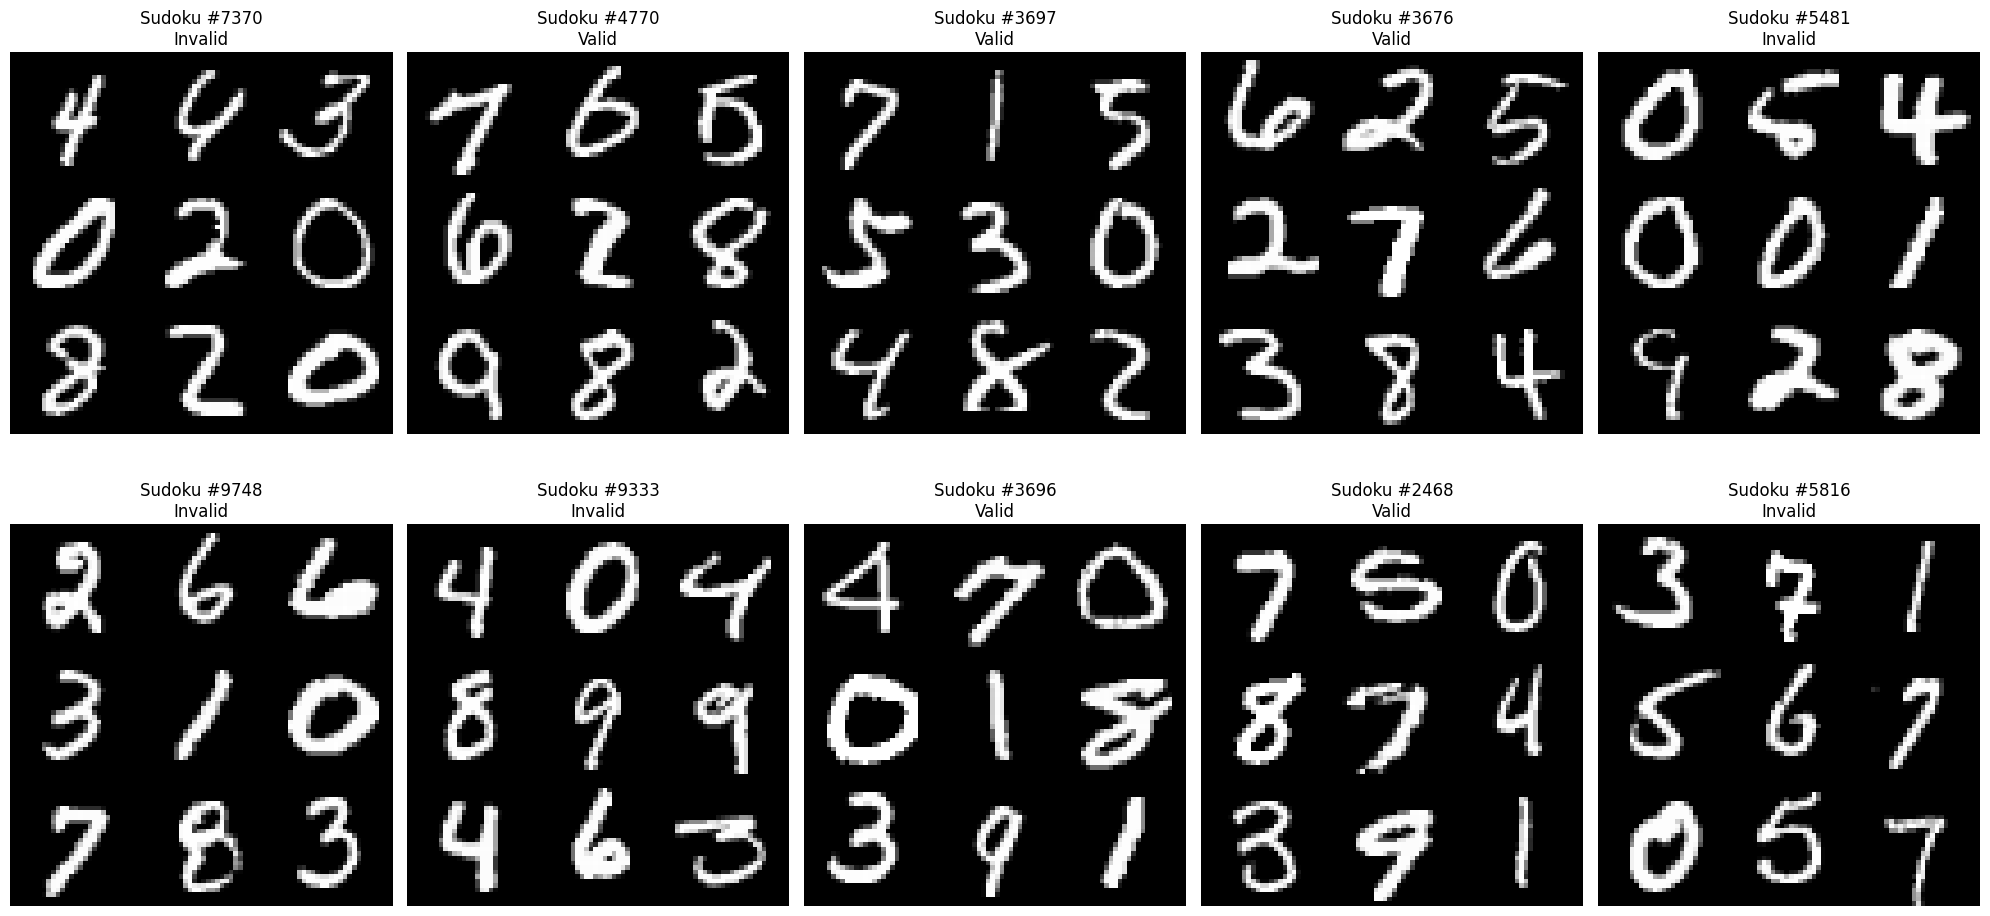

In [ ]:
import matplotlib.pyplot as plt
import random

# Function to display random images with the correct shape
def display_random_images(images, labels, title, num_images=10, image_size=(28 * 3, 28 * 3)):
    """
    Displays random Sudoku images with their labels.

    Args:
        images (list or array): The dataset containing flattened images.
        labels (list or array): The labels indicating valid/invalid Sudoku grids.
        title (str): The title of the plot.
        num_images (int): Number of images to display.
        image_size (tuple): The original 2D shape of the images (height, width).
    """
    plt.figure(figsize=(20, 10))

    # Select a random sample of indices
    random_indices = random.sample(range(len(images)), num_images)

    for i, idx in enumerate(random_indices):
        plt.subplot(2, 5, i + 1)  # Arrange the images in a 2x5 grid
        image = images[idx].reshape(image_size)  # Reshape back to the original 2D size
        plt.imshow(image, cmap='gray')  # Display the image in grayscale
        plt.axis('off')  # Turn off axis
        label = 'Valid' if labels[idx] else 'Invalid'  # Determine the label
        plt.title(f"{title} #{idx}\n{label}")

    plt.tight_layout()  # Ensure a clean layout
    plt.show()

# Example usage
# Assuming `testing_images` is a NumPy array and `testing_labels` is the corresponding list of labels.
display_random_images(testing_images, testing_labels, "Sudoku", image_size=(28 * 3, 28 * 3))
